# CHRC race data from 2017 season

This notebook uses NYRR race data for Crown Heights Running Club to examine team performance across the 2017 season.  The notebook is currently set up to answer the question 'how fast is your club?', but the dataframe is left intentionally broad for additional analysis in the future. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


pace_factors dictionary stores race distances and conversion factors so that race paces across distances can be normed on predicted 10k pace.

In [2]:
pace_factors = {'1m': [1, 6.93], '5k': [3.1, 2.09], '4m': [4, 1.60], '8k': [4.97, 1.27], '5m': [5, 1.26],
                '10k': [6.2, 1.00], '12k': [7.46, 0.82], '15k': [9.32, 0.65], '10m': [10, 0.60], '20k': [12.43, 0.48],
                'half':[ 13.1, 0.45], '25k': [15.53, 0.38], '30k': [18.64, 0.31], '20m': [20, 0.29], 
                'full': [26.2, 0.22]}

pace_conv takes the 'XX:XX' format pace in the NYRR file and converts it to a float value. adj_pace then adjusts the pace value to the corresponding predicted 10k pace.

In [3]:
def pace_conv(item):
    conv_pace = item.split(':')
    try:
        item = float(conv_pace[0]) + (float(conv_pace[1])/60)
    except:
        item = 0.0
    return item

In [4]:
def adj_pace(item):
    item = (item * pace_factors[race_dist][0] * pace_factors[race_dist][1]) / 6.2
    return item

reads in all csv files in folder and adds to dataframe. designed to be easy to update as new race results are released over the season.

In [5]:
df = pd.DataFrame()

race_dir = '/Users/ellykuhlman/Desktop/Running'

for read_file in os.listdir(race_dir):
    filepath = os.path.join(race_dir, read_file)
    if read_file.endswith('.csv'):
        race_id = read_file.rstrip('.csv')
        race_dist = race_id.split('_')[-1] 
        race_dist_num = pace_factors[race_dist][0]
        contents = pd.read_csv(filepath, skiprows=4, converters={'Pace':pace_conv})
        contents = contents.drop(contents.index[len(contents) - 1])
        contents['Adjusted Pace'] = adj_pace(contents['Pace'])
        contents['Race Name'] = race_id
        contents['Distance'] = race_dist_num
        df = df.append(contents)
    else:
        continue

cleans dataframe and adds 'Full Name' column to more accurately identify individual runners

In [6]:
df['Full Name'] = df['First Name'].map(str) + ' ' + df['Last Name'].map(str)
df = df.dropna(axis=1, how='all')

compares spread of team paces across races. for the sake of comparison, uses predicted 10k pace.

In [7]:
df.boxplot(column='Adjusted Pace', by='Race Name', figsize=(20,10), grid=False)

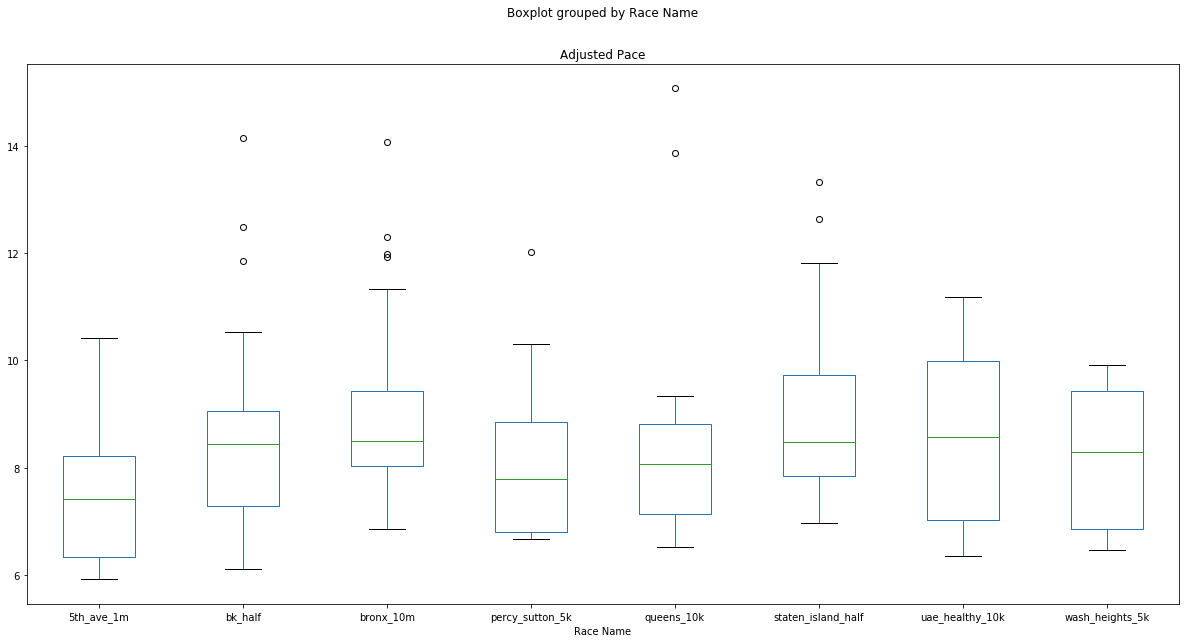

In [8]:
plt.show()

compares the spread of actual paces by distances raced

In [9]:
df.boxplot(column='Pace', by='Distance', figsize=(20,10), grid=False)

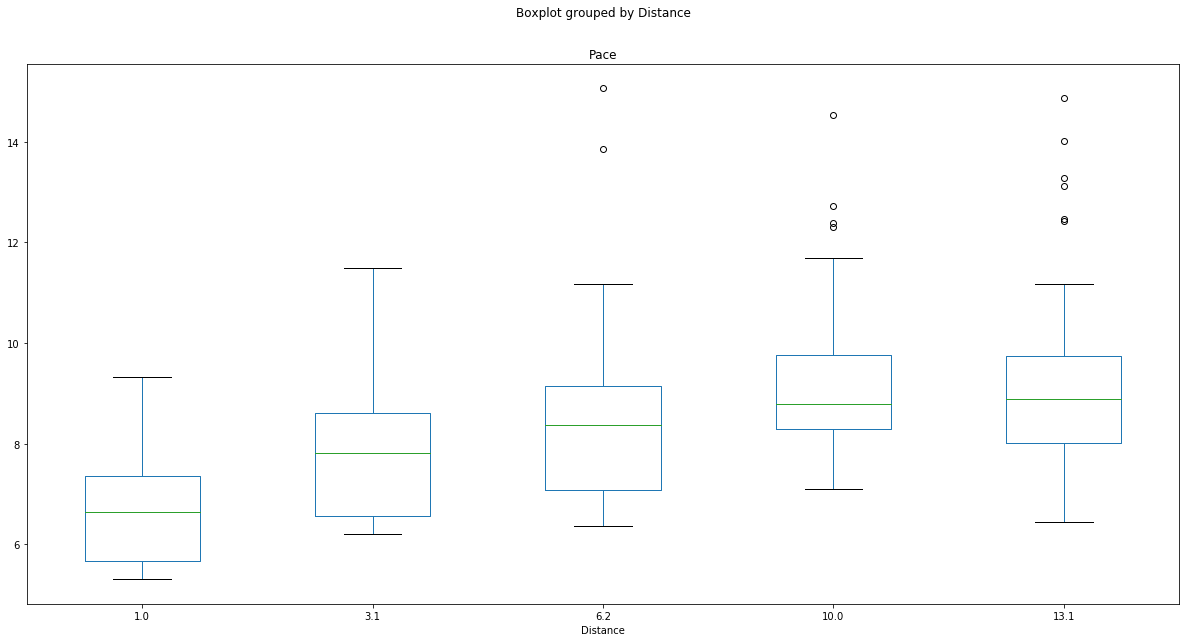

In [10]:
plt.show()

In [11]:
runners = df.groupby('Full Name')

In [15]:
runners_avg_pace = runners['Pace'].mean()

In [26]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(runners_avg_pace, 12)

In [22]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [27]:
fracs = bins.astype(float)/bins.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    thispatch.set_edgecolor('k')

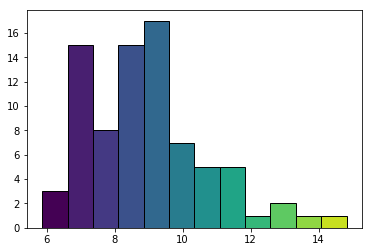

In [28]:
plt.show()

In [30]:
df

,Overall Place,Gender Place,Age-Group Place,Bib,First Name,Last Name,Gender/Age,IAAF,Overall Time,Pace,Age-Graded Time,Age-Graded Place,Age- Graded Percent,Adjusted Pace,Race Name,Distance,Full Name
0,568.0,502.0,105.0,8395.0,Spencer,Mccormick,M31,USA,0:05:18,5.300000,0:05:16,846.0,70.46%,5.924032,5th_ave_1m,1.0,Spencer Mccormick
1,696.0,609.0,109.0,7243.0,James,Bennett,M36,USA,0:05:25,5.416667,0:05:16,840.0,70.51%,6.054435,5th_ave_1m,1.0,James Bennett
2,764.0,669.0,143.0,8589.0,Roberto,Bassi,M33,USA,0:05:28,5.466667,0:05:24,1043.0,68.77%,6.110323,5th_ave_1m,1.0,Roberto Bassi
3,956.0,836.0,189.0,4741.0,David,Gibbons,M31,USA,0:05:36,5.600000,0:05:34,1320.0,66.68%,6.259355,5th_ave_1m,1.0,David Gibbons
4,1183.0,1030.0,240.0,7977.0,Peter,Meegan,M31,USA,0:05:44,5.733333,0:05:42,1585.0,65.16%,6.408387,5th_ave_1m,1.0,Peter Meegan
5,1911.0,288.0,31.0,886.0,Leslie,Lillo,F37,USA,0:06:05,6.083333,0:05:54,405.0,71.15%,6.799597,5th_ave_1m,1.0,Leslie Lillo
6,2077.0,328.0,70.0,6780.0,Carol,Gottshall,F30,USA,0:06:09,6.150000,0:06:09,578.0,68.31%,6.874113,5th_ave_1m,1.0,Carol Gottshall
7,3175.0,672.0,156.0,6261.0,Nicole,Teeny,F31,USA,0:06:38,6.633333,0:06:37,1031.0,63.51%,7.414355,5th_ave_1m,1.0,Nicole Teeny
8,3254.0,2546.0,507.0,7407.0,Brian,Laws,M28,USA,0:06:40,6.666667,0:06:40,3103.0,55.75%,7.451613,5th_ave_1m,1.0,Brian Laws
9,3546.0,2692.0,473.0,3397.0,Stephen,Nash-Webber,M39,USA,0:06:48,6.800000,0:06:28,2863.0,57.43%,7.600645,5th_ave_1m,1.0,Stephen Nash-Webber


In [32]:
df = df.reset_index()

In [34]:
df.to_json(orient='records')

'[{"index":0,"Overall Place":568.0,"Gender Place":502.0,"Age-Group Place":105.0,"Bib":8395.0,"First Name":"Spencer","Last Name":"Mccormick","Gender\\/Age":"M31","IAAF":"USA","Overall Time":"0:05:18","Pace":5.3,"Age-Graded Time":"0:05:16","Age-Graded Place":846.0,"Age- Graded Percent":"70.46%","Adjusted Pace":5.9240322581,"Race Name":"5th_ave_1m","Distance":1.0,"Full Name":"Spencer Mccormick"},{"index":1,"Overall Place":696.0,"Gender Place":609.0,"Age-Group Place":109.0,"Bib":7243.0,"First Name":"James","Last Name":"Bennett","Gender\\/Age":"M36","IAAF":"USA","Overall Time":"0:05:25","Pace":5.4166666667,"Age-Graded Time":"0:05:16","Age-Graded Place":840.0,"Age- Graded Percent":"70.51%","Adjusted Pace":6.0544354839,"Race Name":"5th_ave_1m","Distance":1.0,"Full Name":"James Bennett"},{"index":2,"Overall Place":764.0,"Gender Place":669.0,"Age-Group Place":143.0,"Bib":8589.0,"First Name":"Roberto","Last Name":"Bassi","Gender\\/Age":"M33","IAAF":"USA","Overall Time":"0:05:28","Pace":5.4666666